# AI Solicitor: SMS Spam Detection

In [255]:
! pip install torch tensorflow keras

In [256]:
! pip install matplotlib

In [257]:
! pip install nltk

In [258]:
! pip install scikit-learn

In [259]:
! pip install imblearn

In [260]:
! pip install wordcloud

In [261]:
! pip install seaborn

In [262]:
! pip install textblob

In [263]:
! pip install transformers

# Importing Libraries

In [264]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Exploratory data Analysis

In [265]:
! pip install wordcloud

### High Level Data Inspection

In [266]:
! pip install seaborn

In [267]:
dataset1 = pd.read_csv("Datasets\spam (1).csv", encoding='latin1')
dataset1.head()

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\bdcalling123\AppData\Local\Temp\ipykernel_2384\713980814.py:1: SyntaxWarning: invalid escape sequence '\s'
  dataset1 = pd.read_csv("Datasets\spam (1).csv", encoding='latin1')


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [268]:
dataset1.shape

(5572, 5)

In [269]:
# delete unnecessary columns
dataset1 = dataset1.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
dataset1.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


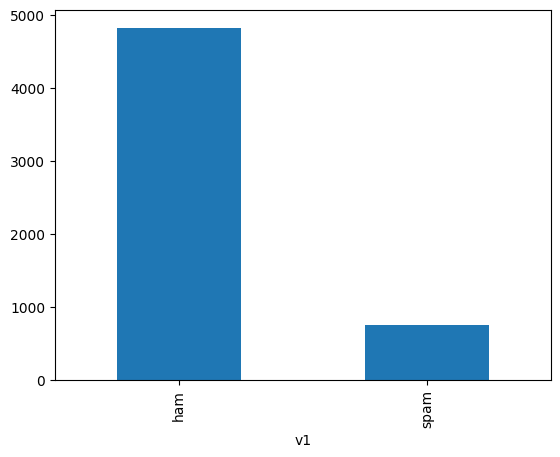

In [270]:
# class distribution analysis
dataset1['v1'].value_counts().plot(kind='bar')
plt.show()

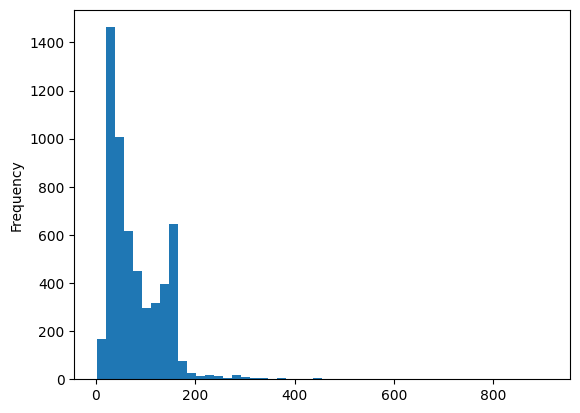

In [271]:
# MSG length analysis
dataset1['length'] = dataset1['v2'].apply(len)
dataset1['length'].plot(bins=50, kind='hist')
plt.show()

In [272]:
# handle missing values
dataset1.isnull().sum()

v1        0
v2        0
length    0
dtype: int64

In [273]:
# examine data types
dataset1.dtypes

v1        object
v2        object
length     int64
dtype: object

In [274]:
# use SMOTE to handle class imbalance
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
X = dataset1['v2']
y = dataset1['v1']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_vec, y_train)
model = MultinomialNB()
model.fit(X_train_res, y_train_res)
y_pred = model.predict(X_test_vec)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9730941704035875


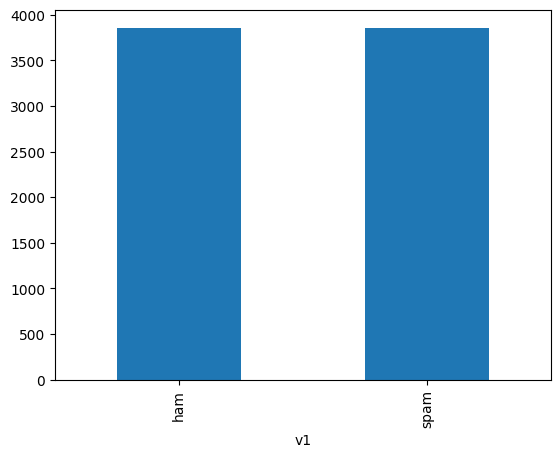

In [275]:
# analyzing the class distribution afetr SMOTE
y_train_res.value_counts().plot(kind='bar')
plt.show()

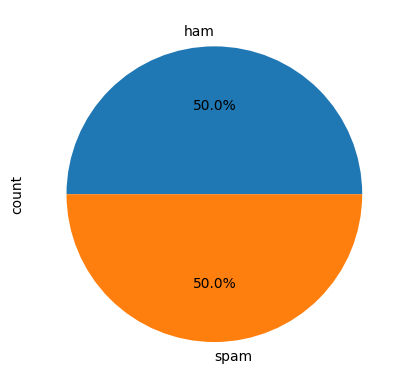

In [276]:
# class distribution pie chart
y_train_res.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

In [277]:
#  Print out a few examples of both spam and ham messages to get a qualitative sense of the differences in their content.
print("Spam Messages:")
print(dataset1[dataset1['v1'] == 'spam']['v2'].sample(5, random_state=42))
print("\nHam Messages:")
print(dataset1[dataset1['v1'] == 'ham']['v2'].sample(5, random_state=42))

Spam Messages:
1455    Summers finally here! Fancy a chat or flirt wi...
1852    This is the 2nd time we have tried 2 contact u...
672     Get ur 1st RINGTONE FREE NOW! Reply to this ms...
946     Ur cash-balance is currently 500 pounds - to m...
2879    Last Chance! Claim ur å£150 worth of discount ...
Name: v2, dtype: object

Ham Messages:
3714    I am late,so call you tomorrow morning.take ca...
1311    U r too much close to my heart. If u go away i...
548                                Wait  &lt;#&gt;  min..
1324    Can you call me plz. Your number shows out of ...
3184    MAYBE IF YOU WOKE UP BEFORE FUCKING 3 THIS WOU...
Name: v2, dtype: object


### Message Length Distribution Analysis

In [278]:
# create length feature
dataset1['length'] = dataset1['v2'].apply(len)
dataset1.head(10)

,v1,v2,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
5,spam,FreeMsg Hey there darling it's been 3 week's n...,148
6,ham,Even my brother is not like to speak with me. ...,77
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160
8,spam,WINNER!! As a valued network customer you have...,158
9,spam,Had your mobile 11 months or more? U R entitle...,154


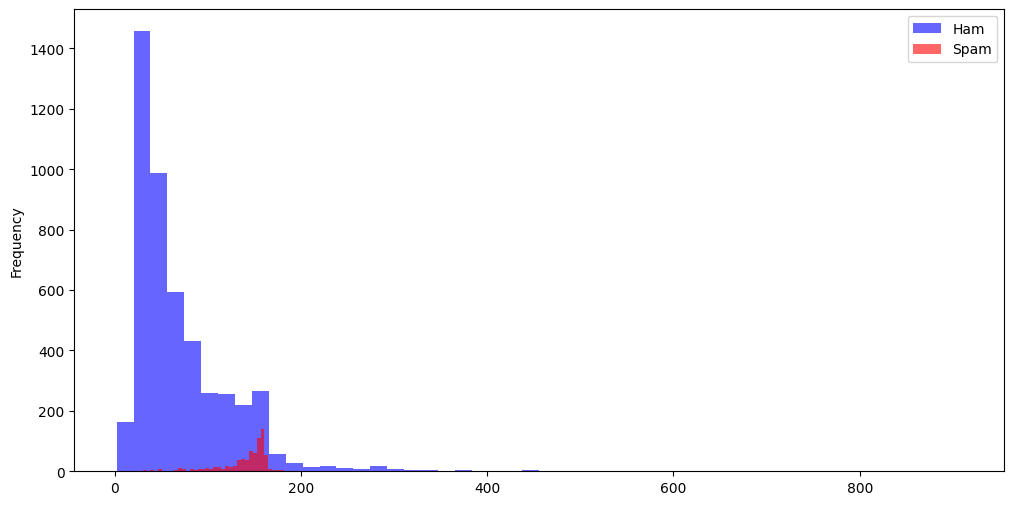

In [279]:
# comapre length distribution between spam and ham
plt.figure(figsize=(12, 6))
dataset1[dataset1['v1'] == 'ham']['length'].plot(bins=50, kind='hist', color='blue', alpha=0.6, label='Ham')
dataset1[dataset1['v1'] == 'spam']['length'].plot(bins=50, kind='hist', color='red', alpha=0.6, label='Spam')
plt.legend()

### Punctuation and spacial charecter analysis

In [280]:
# count punctuations
import string
dataset1['punctuation_count'] = dataset1['v2'].apply(lambda x: sum(1 for char in x if char in string.punctuation))
dataset1.head(10)

,v1,v2,length,punctuation_count
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
5,spam,FreeMsg Hey there darling it's been 3 week's n...,148,8
6,ham,Even my brother is not like to speak with me. ...,77,2
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160,6
8,spam,WINNER!! As a valued network customer you have...,158,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2


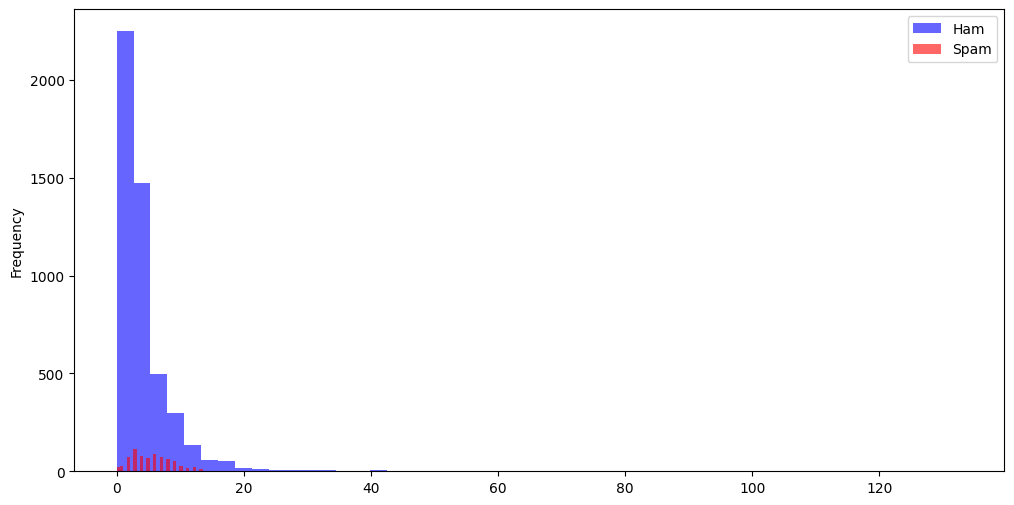

In [281]:
# compare counts per message between spam and ham
plt.figure(figsize=(12, 6))
dataset1[dataset1['v1'] == 'ham']['punctuation_count'].plot(bins=50, kind='hist', color='blue', alpha=0.6, label='Ham')
dataset1[dataset1['v1'] == 'spam']['punctuation_count'].plot(bins=50, kind='hist', color='red', alpha=0.6, label='Spam')
plt.legend()

### Word Level Analysis

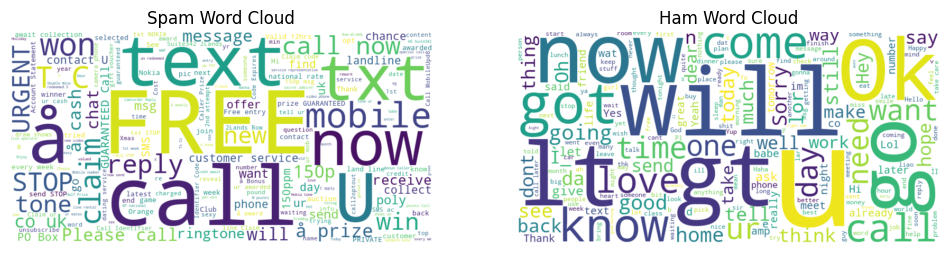

In [282]:
# create word clouds for spam and ham messages
from wordcloud import WordCloud
spam_words = ' '.join(dataset1[dataset1['v1'] == 'spam']['v2'])
ham_words = ' '.join(dataset1[dataset1['v1'] == 'ham']['v2'])
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_words)
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_words)
# Display the word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Spam Word Cloud')
plt.subplot(1, 2, 2)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Ham Word Cloud')
plt.show()

In [283]:
# Comapre top n-grams between spam and ham messages
from sklearn.feature_extraction.text import CountVectorizer
def get_top_ngrams(corpus, n=None, ngram_range=(1, 1)):
    vec = CountVectorizer(ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]
# Comapre top n-grams between spam and ham messages
from sklearn.feature_extraction.text import CountVectorizer 
def compare_spam_ham_ngrams(spam_corpus, ham_corpus, n=None, ngram_range=(1, 1)):
    spam_ngrams = get_top_ngrams(spam_corpus, n=n, ngram_range=ngram_range)
    ham_ngrams = get_top_ngrams(ham_corpus, n=n, ngram_range=ngram_range)
    return spam_ngrams, ham_ngrams
spam_corpus = dataset1[dataset1['v1'] == 'spam']['v2']
ham_corpus = dataset1[dataset1['v1'] == 'ham']['v2']
top_n = 20
spam_ngrams, ham_ngrams = compare_spam_ham_ngrams(spam_corpus, ham_corpus, n=top_n, ngram_range=(1, 2))
print(f"Top {top_n} Spam N-grams:")
for ngram, freq in spam_ngrams:
    print(f"  {ngram}: {freq}")
print(f"Top {top_n} Ham N-grams:")
for ngram, freq in ham_ngrams:
    print(f"  {ngram}: {freq}")

Top 20 Spam N-grams:
  to: 688
  call: 355
  you: 297
  your: 264
  free: 224
  the: 206
  for: 203
  now: 199
  or: 188
  txt: 163
  is: 158
  on: 144
  ur: 144
  have: 135
  from: 131
  mobile: 127
  text: 125
  and: 122
  stop: 121
  claim: 113
Top 20 Ham N-grams:
  you: 1943
  to: 1554
  the: 1122
  and: 857
  in: 818
  me: 772
  my: 750
  is: 732
  it: 711
  that: 551
  of: 525
  for: 501
  have: 440
  can: 439
  so: 435
  but: 434
  your: 417
  not: 415
  are: 414
  on: 393


In [284]:
# analyze case usages
def analyze_case_usages(corpus):
    case_usages = {}
    for text in corpus:
        for word in text.split():
            # Count the occurrences of each word with its case
            case_usages[word] = case_usages.get(word, 0) + 1
    return case_usages
spam_case_usages = analyze_case_usages(spam_corpus)
ham_case_usages = analyze_case_usages(ham_corpus)
spam_case_usages = analyze_case_usages(spam_corpus)
ham_case_usages = analyze_case_usages(ham_corpus)
print("Spam Case Usages (sample):", dict(list(spam_case_usages.items())[:10]))
print("Ham Case Usages (sample):", dict(list(ham_case_usages.items())[:10]))

Spam Case Usages (sample): {'Free': 35, 'entry': 25, 'in': 64, '2': 169, 'a': 358, 'wkly': 10, 'comp': 9, 'to': 604, 'win': 28, 'FA': 4}
Ham Case Usages (sample): {'Go': 10, 'until': 21, 'jurong': 1, 'point,': 1, 'crazy..': 1, 'Available': 1, 'only': 102, 'in': 734, 'bugis': 4, 'n': 128}


### Numerical and URL Analysis

In [285]:
# count numerical digits
import re
dataset1['digit_count'] = dataset1['v2'].apply(lambda x: len(re.findall(r'\d', x)))
dataset1.head(10)

,v1,v2,length,punctuation_count,digit_count
0,ham,"Go until jurong point, crazy.. Available only ...",111,9,0
1,ham,Ok lar... Joking wif u oni...,29,6,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6,25
3,ham,U dun say so early hor... U c already then say...,49,6,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2,0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,148,8,4
6,ham,Even my brother is not like to speak with me. ...,77,2,0
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160,6,1
8,spam,WINNER!! As a valued network customer you have...,158,6,19
9,spam,Had your mobile 11 months or more? U R entitle...,154,2,13


In [286]:
# count URLs
import re
def count_urls(text):
    url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    return len(re.findall(url_pattern, text))

dataset1['url_count'] = dataset1['v2'].apply(count_urls)
dataset1.head(60)

,v1,v2,length,punctuation_count,digit_count,url_count
0,ham,"Go until jurong point, crazy.. Available only ...",111,9,0,0
1,ham,Ok lar... Joking wif u oni...,29,6,0,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6,25,0
3,ham,U dun say so early hor... U c already then say...,49,6,0,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2,0,0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,148,8,4,0
6,ham,Even my brother is not like to speak with me. ...,77,2,0,0
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160,6,1,0
8,spam,WINNER!! As a valued network customer you have...,158,6,19,0
9,spam,Had your mobile 11 months or more? U R entitle...,154,2,13,0


<Axes: title={'center': 'URL Count'}, xlabel='v1', ylabel='url_count'>

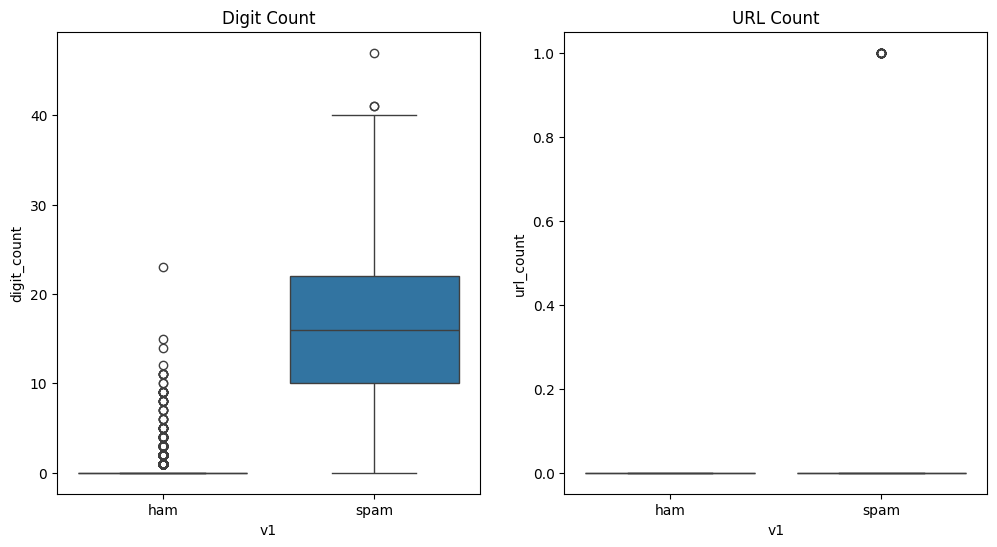

In [287]:
# compare counts per message between spam and ham
import seaborn as sns
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Digit Count")
sns.boxplot(x='v1', y='digit_count', data=dataset1)
plt.subplot(1, 2, 2)
plt.title("URL Count")
sns.boxplot(x='v1', y='url_count', data=dataset1)

### Linguistic Feature Analysis

In [288]:
# analyze abbreviations and slangs
abbreviations = {
    "u": "you",
    "ur": "your",
    "btw": "by the way",
    "idk": "I don't know",
    "imo": "in my opinion",
    "brb": "be right back",
    "lol": "laughing out loud",
    "omg": "oh my god",
    "ttyl": "talk to you later",
    "thx": "thanks",
    "pls": "please",
    "gr8": "great",
    "b4": "before",
    "l8r": "later",
    "cya": "see you",
    "np": "no problem",
    "smh": "shaking my head",
    "fyi": "for your information",
    "asap": "as soon as possible",
    "tbh": "to be honest",
    "imo": "in my opinion",
    "jk": "just kidding",
    "rofl": "rolling on the floor laughing",
    "wtf": "what the fuck",
    "yolo": "you only live once",
    "bff": "best friends forever",
    "irl": "in real life",
    "dm": "direct message",
    "ftw": "for the win",
    "fomo": "fear of missing out",
    "tmi": "too much information",
    "ily": "I love you",
    "xoxo": "hugs and kisses",
    "wyd": "what are you doing",
    "hbu": "how about you",
    "ikr": "I know right",
    "nvm": "never mind",
    "ppl": "people",
    "sry": "sorry",
    "thx": "thanks",
    "ty": "thank you",
    "yw": "you're welcome",
    "bc": "because",
    "cuz": "because",
    "bday": "birthday",
    "msg": "message",
    "txt": "text",
    "pic": "picture",
    "vid": "video",
    "atm": "at the moment",
    "bbl": "be back later",
    "cya": "see you",
    "fml": "fuck my life",
    "smh": "shaking my head",
    "tysm": "thank you so much"
}

In [289]:
# evaluate readability: For advanced analysis, compute readability scores. Some research suggests that spam messages have a lower readability score due to their simple language and structure.

def evaluate_readability(text):
    readability_score = textstat.flesch_kincaid_grade(text)
    return readability_score

In [290]:
dataset1.shape

(5572, 6)

In [291]:
X.shape

(5572,)

In [292]:
y.shape

(5572,)

# Advanced Preprocessing Pipeline

### Initial Cleaning

In [293]:
 # convert to lowercase
X = X.str.lower()

In [294]:
X.head()

0    go until jurong point, crazy.. available only ...
1                        ok lar... joking wif u oni...
2    free entry in 2 a wkly comp to win fa cup fina...
3    u dun say so early hor... u c already then say...
4    nah i don't think he goes to usf, he lives aro...
Name: v2, dtype: object

In [295]:
# Noise Removal
# replace URL with token like <url>
X = X.str.replace(r'http\S+|www\S+|https\S+', '<url>', case=False, regex=True)

# replace email with token like <email>
X = X.str.replace(r'\S+@\S+', '<email>', case=False, regex=True)

#replace phone numbers with token like <phone>
X = X.str.replace(r'\+?\d[\d -]{8,12}\d', '<phone>', case=False, regex=True)

In [296]:
# handle encoding issue
X = X.str.encode('utf-8', errors='ignore').str.decode('utf-8')
X.head(10)

0    go until jurong point, crazy.. available only ...
1                        ok lar... joking wif u oni...
2    free entry in 2 a wkly comp to win fa cup fina...
3    u dun say so early hor... u c already then say...
4    nah i don't think he goes to usf, he lives aro...
5    freemsg hey there darling it's been 3 week's n...
6    even my brother is not like to speak with me. ...
7    as per your request 'melle melle (oru minnamin...
8    winner!! as a valued network customer you have...
9    had your mobile 11 months or more? u r entitle...
Name: v2, dtype: object

In [297]:
# keep meaningful punctuations
X = X.str.replace(r'[^\w\s,.!?]', '', regex=True)
X.head(10)

0    go until jurong point, crazy.. available only ...
1                        ok lar... joking wif u oni...
2    free entry in 2 a wkly comp to win fa cup fina...
3    u dun say so early hor... u c already then say...
4    nah i dont think he goes to usf, he lives arou...
5    freemsg hey there darling its been 3 weeks now...
6    even my brother is not like to speak with me. ...
7    as per your request melle melle oru minnaminun...
8    winner!! as a valued network customer you have...
9    had your mobile 11 months or more? u r entitle...
Name: v2, dtype: object

### Feature Engineering

In [298]:
# currency and transaction tokenization
X = X.str.replace(r'\$\d+(\.\d{2})?', '<money>', regex=True)
X = X.str.replace(r'\d+%','<percentage>', regex=True)
X.head(10)

0    go until jurong point, crazy.. available only ...
1                        ok lar... joking wif u oni...
2    free entry in 2 a wkly comp to win fa cup fina...
3    u dun say so early hor... u c already then say...
4    nah i dont think he goes to usf, he lives arou...
5    freemsg hey there darling its been 3 weeks now...
6    even my brother is not like to speak with me. ...
7    as per your request melle melle oru minnaminun...
8    winner!! as a valued network customer you have...
9    had your mobile 11 months or more? u r entitle...
Name: v2, dtype: object

In [299]:
# capital letter ratio in the whole dataset
X = X.str.replace(r'([A-Z]{2,})', lambda m: m.group(1).lower(), regex=True)
X.head(10)

0    go until jurong point, crazy.. available only ...
1                        ok lar... joking wif u oni...
2    free entry in 2 a wkly comp to win fa cup fina...
3    u dun say so early hor... u c already then say...
4    nah i dont think he goes to usf, he lives arou...
5    freemsg hey there darling its been 3 weeks now...
6    even my brother is not like to speak with me. ...
7    as per your request melle melle oru minnaminun...
8    winner!! as a valued network customer you have...
9    had your mobile 11 months or more? u r entitle...
Name: v2, dtype: object

### Advanced Text processing

### Word Level Tokenization

In [300]:
from nltk.tokenize import word_tokenize
import nltk

# Download required NLTK data
nltk.download('punkt_tab', quiet=True)

def safe_tokenize(text):
    try:
        return word_tokenize(str(text))
    except Exception as e:
        print(f"Error tokenizing text: {e}")
        return str(text).split()

# Apply tokenization
print("Tokenizing messages...")
X = X.apply(safe_tokenize)
print("Tokenization complete!\n")
print("Sample tokenized messages:")
print(X.head())

Tokenizing messages...
Tokenization complete!

Sample tokenized messages:
0    [go, until, jurong, point, ,, crazy, .., avail...
1             [ok, lar, ..., joking, wif, u, oni, ...]
2    [free, entry, in, 2, a, wkly, comp, to, win, f...
3    [u, dun, say, so, early, hor, ..., u, c, alrea...
4    [nah, i, dont, think, he, goes, to, usf, ,, he...
Name: v2, dtype: object


In [301]:
# stop word removal
from nltk.corpus import stopwords
nltk.download('stopwords', quiet=True)
stop_words = set(stopwords.words('english'))
X = X.apply(lambda tokens: [word for word in tokens if word not in stop_words])
X.head(10)

0    [go, jurong, point, ,, crazy, .., available, b...
1             [ok, lar, ..., joking, wif, u, oni, ...]
2    [free, entry, 2, wkly, comp, win, fa, cup, fin...
3    [u, dun, say, early, hor, ..., u, c, already, ...
4    [nah, dont, think, goes, usf, ,, lives, around...
5    [freemsg, hey, darling, 3, weeks, word, back, ...
6    [even, brother, like, speak, ., treat, like, a...
7    [per, request, melle, melle, oru, minnaminungi...
8    [winner, !, !, valued, network, customer, sele...
9    [mobile, 11, months, ?, u, r, entitled, update...
Name: v2, dtype: object

### lemmatization

In [302]:
# accurate lemmatization using WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)
lemmatizer = WordNetLemmatizer()
X = X.apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])
X.head(10)

0    [go, jurong, point, ,, crazy, .., available, b...
1             [ok, lar, ..., joking, wif, u, oni, ...]
2    [free, entry, 2, wkly, comp, win, fa, cup, fin...
3    [u, dun, say, early, hor, ..., u, c, already, ...
4    [nah, dont, think, go, usf, ,, life, around, t...
5    [freemsg, hey, darling, 3, week, word, back, !...
6    [even, brother, like, speak, ., treat, like, a...
7    [per, request, melle, melle, oru, minnaminungi...
8    [winner, !, !, valued, network, customer, sele...
9    [mobile, 11, month, ?, u, r, entitled, update,...
Name: v2, dtype: object

### Spelling  Correction

In [303]:
# spelling correction
from textblob import TextBlob

def correct_spelling(text):
    try:
        return str(TextBlob(text).correct())
    except Exception as e:
        print(f"Error correcting spelling: {e}")
        return text

# Apply spelling correction
print("Correcting spelling...")
X = X.apply(lambda tokens: [correct_spelling(word) for word in tokens])
print("Spelling correction complete!\n")
print("Sample corrected messages:")
print(X.head(10))

Correcting spelling...
Spelling correction complete!

Sample corrected messages:
0    [go, during, point, ,, crazy, .., available, b...
1               [ok, war, ..., joking, if, u, on, ...]
2    [free, entry, 2, wily, come, win, a, cup, fina...
3    [u, dun, say, early, for, ..., u, c, already, ...
4    [ah, dont, think, go, us, ,, life, around, tho...
5    [freemen, hey, darling, 3, week, word, back, !...
6    [even, brother, like, speak, ., treat, like, a...
7    [per, request, selle, selle, or, minnaminungin...
8    [winner, !, !, valued, network, customer, sele...
9    [mobile, 11, month, ?, u, r, entitled, update,...
Name: v2, dtype: object


In [304]:
from transformers import BertTokenizer

# Load the BERT tokenizer for uncased English text
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def tokenize_and_pad(texts, max_length=512):
    """
    Tokenize, truncate, and pad: Convert text messages into input IDs and an attention mask.
    Add special tokens ([CLS] at the beginning and [SEP] at the end) as BERT expects.
    Truncate longer sequences that exceed BERT's maximum sequence length (typically 512 tokens).
    Pad shorter sequences with [PAD] tokens so that all messages have the same length.
    
    Args:
        texts: List, pandas Series, or DataFrame of text strings to tokenize. If DataFrame, uses the first column.
        max_length: Maximum sequence length for truncation and padding.
    
    Returns:
        Dict with 'input_ids' and 'attention_mask' as PyTorch tensors.
    """
    # Handle DataFrame input by selecting the first text column
    if hasattr(texts, 'columns'):
        texts = texts.iloc[:, 0]
    
    # Ensure texts is a list of strings, handling potential nested sequences
    tokenized_texts = []
    for item in texts:
        if isinstance(item, (list, tuple)):
            # Join nested sequences into a single string
            tokenized_texts.append(' '.join(str(subitem) for subitem in item))
        else:
            tokenized_texts.append(str(item))
    
    # Tokenize and encode the texts: adds special tokens, truncates, and pads
    encodings = tokenizer(
        tokenized_texts,
        truncation=True,
        padding=True,
        max_length=max_length,
        return_tensors='pt'
    )
    
    # The encodings include input_ids (token indices) and attention_mask (1s for real tokens, 0s for padding)
    return encodings

# Assuming X is a list, Series, or DataFrame of text messages
X = tokenize_and_pad(X)

In [307]:
# show te head of the tokenized and padded input IDs
print(X['input_ids'][:10])

tensor([[ 101, 2175, 2076,  ...,    0,    0,    0],
        [ 101, 7929, 2162,  ...,    0,    0,    0],
        [ 101, 2489, 4443,  ...,    0,    0,    0],
        ...,
        [ 101, 2566, 5227,  ...,    0,    0,    0],
        [ 101, 3453,  999,  ...,    0,    0,    0],
        [ 101, 4684, 2340,  ...,    0,    0,    0]])


### Create Attention Masks

In [309]:
from transformers import BertTokenizer

# Load the BERT tokenizer for uncased English text
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def tokenize_and_pad(texts, max_length=512):
    # Handle DataFrame input by selecting the first text column
    if hasattr(texts, 'columns'):
        texts = texts.iloc[:, 0]
    
    # Ensure texts is a list of strings, handling potential nested sequences
    tokenized_texts = []
    for item in texts:
        if isinstance(item, (list, tuple)):
            # Join nested sequences into a single string
            tokenized_texts.append(' '.join(str(subitem) for subitem in item))
        else:
            tokenized_texts.append(str(item))
    
    # Tokenize and encode the texts: adds special tokens, truncates, and pads
    encodings = tokenizer(
        tokenized_texts,
        truncation=True,
        padding=True,
        max_length=max_length,
        return_tensors='pt'
    )
    
    # The encodings include input_ids (token indices) and attention_mask (1s for real tokens, 0s for padding)
    return encodings

# Assuming X is a list, Series, or DataFrame of text messages
X = tokenize_and_pad(X)

# Note: X['attention_mask'] is already available and equivalent to the manual computation below.
# Create attention masks: Generate an attention mask to distinguish real tokens from padding tokens.
# This is a binary array indicating whether the model should "pay attention" to a token (1) or ignore it (0).
attention_masks = (X['input_ids'] != tokenizer.pad_token_id).long()
attention_masks[:10]

tensor([[1, 1, 1, 1, 1, 1, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 0, 0, 0]])